In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import json
import string
import re
from collections import Counter

# Load data

In [2]:
# Import the dataset
with open("data/politifact.json") as json_file:
    data = json.load(json_file)

# The dataset is imported and the first five rows are shown.
# Head of dataset
politifact = pd.DataFrame(data)
politifact.head(5)    

,claim,doc,label,factchecker,published,speaker,date_stated,stated_in,url,topic,sources,summary
0,There were no American flags at the first Demo...,"In the race to the White House, who is the mos...",false,Ciara O'Rourke,2019-6-28,Viral image,2019-6-27,a post,https://www.politifact.com/factchecks/2019/jun...,"[Debates, Patriotism, Facebook fact-checks, Vi...","[{'description': 'Facebookpost, June 27, 2019'...",None
1,"Quotes Thomas Jefferson as saying that ""a gove...",A post that recently popped up on social media...,false,Samantha Putterman,2019-6-6,Facebook posts,2019-6-4,a Facebook post,https://www.politifact.com/factchecks/2019/jun...,"[Fake news, Government Regulation, Facebook fa...","[{'description': 'Facebookpost, June 4, 2019',...",None
2,Leaving @[4:0] as a Facebook comment can revea...,Privacy concerns abound on social media these ...,false,Ciara O'Rourke,2019-6-6,Viral image,2019-6-28,a Facebook post,https://www.politifact.com/factchecks/2019/jun...,"[Facebook fact-checks, Privacy Issues, Viral i...","[{'description': 'Facebookpost, May 28, 2019',...",None
3,"""Disease-ridden"" migrants from parts of Africa...",Are Ebola-infected Congolese migrants streamin...,false,Louis Jacobson,2019-6-12,Conservative Daily Post,2019-6-10,a post,https://www.politifact.com/factchecks/2019/jun...,"[Immigration, Public Health, Facebook fact-che...","[{'description': 'Conservative Daily Post, ""Di...",None
4,Says Islamic studies professor Tariq Ramadan s...,"Tariq Ramadan, a professor of Islamic studies ...",false,Samantha Putterman,2019-3-29,Facebook posts,2019-3-20,a Facebook post,https://www.politifact.com/factchecks/2019/mar...,"[Religion, Facebook fact-checks, Facebook posts]","[{'description': 'Facebookpost, March 20, 2019...",None


In [3]:
# Dimensions of dataset
politifact.shape

(18379, 12)

In [4]:
# Import the dataset
with open("data/snopes.json") as json_file:
    data = json.load(json_file)
    
# The dataset is imported and the first five rows are shown.
# Head of dataset
snopes = pd.DataFrame(data)
snopes.head(5)    

,label,claim,doc,factchecker,published,url,topic,sources,extra_description
0,False,Storing a car battery on a concrete floor will...,Much of what makes a car go remains an arcane ...,Snopes Staff,2011-1-4,https://www.snopes.com/fact-check/battery-park/,"[Automobiles, Techno File]","[{'description': 'Magliozzi, Tom and Ray. “Cli...",None
1,True,U.S. President Donald Trump tapped World Wrest...,"In mid-April 2020, controversy consumed the Tr...",Bethania Palma,2020-4-16,https://www.snopes.com/fact-check/coronavirus-...,"[Politics, COVID-19]","[{'description': 'McGeorge, Alistair.“Donald T...",None
2,True,An image shows a restaurant receipt displaying...,"In May 2020, social media users began sharing ...",David Mikkelson,2020-5-13,https://www.snopes.com/fact-check/covid-surcha...,"[Business, COVID-19]","[{'description': 'Deere, Michael. “Several Wes...",None
3,Outdated,A massive human-made sinkhole opened up in Gua...,"In early October 2019, readers searched the Sn...",Bethania Palma,2019-10-9,https://www.snopes.com/fact-check/guatemala-si...,[Science],"[{'description': 'Than, Ker. “Guatemala Sinkho...",None
4,True,"Police in Crawford County, Georgia forced loca...","In December 2017, disturbing reports surfaceed...",Dan MacGuill,2017-12-7,https://www.snopes.com/fact-check/georgia-poli...,"[Critter Country, animal cruelty, animals, cra...","[{'description': 'Shaw, Mary Grace; Plaskowsky...",None


In [5]:
# Dimensions of dataset
snopes.shape

(3919, 9)

In [6]:
data = pd.concat([politifact, snopes], ignore_index=True, sort=False)
data.head(5)

,claim,doc,label,factchecker,published,speaker,date_stated,stated_in,url,topic,sources,summary,extra_description
0,There were no American flags at the first Demo...,"In the race to the White House, who is the mos...",false,Ciara O'Rourke,2019-6-28,Viral image,2019-6-27,a post,https://www.politifact.com/factchecks/2019/jun...,"[Debates, Patriotism, Facebook fact-checks, Vi...","[{'description': 'Facebookpost, June 27, 2019'...",None,NaN
1,"Quotes Thomas Jefferson as saying that ""a gove...",A post that recently popped up on social media...,false,Samantha Putterman,2019-6-6,Facebook posts,2019-6-4,a Facebook post,https://www.politifact.com/factchecks/2019/jun...,"[Fake news, Government Regulation, Facebook fa...","[{'description': 'Facebookpost, June 4, 2019',...",None,NaN
2,Leaving @[4:0] as a Facebook comment can revea...,Privacy concerns abound on social media these ...,false,Ciara O'Rourke,2019-6-6,Viral image,2019-6-28,a Facebook post,https://www.politifact.com/factchecks/2019/jun...,"[Facebook fact-checks, Privacy Issues, Viral i...","[{'description': 'Facebookpost, May 28, 2019',...",None,NaN
3,"""Disease-ridden"" migrants from parts of Africa...",Are Ebola-infected Congolese migrants streamin...,false,Louis Jacobson,2019-6-12,Conservative Daily Post,2019-6-10,a post,https://www.politifact.com/factchecks/2019/jun...,"[Immigration, Public Health, Facebook fact-che...","[{'description': 'Conservative Daily Post, ""Di...",None,NaN
4,Says Islamic studies professor Tariq Ramadan s...,"Tariq Ramadan, a professor of Islamic studies ...",false,Samantha Putterman,2019-3-29,Facebook posts,2019-3-20,a Facebook post,https://www.politifact.com/factchecks/2019/mar...,"[Religion, Facebook fact-checks, Facebook posts]","[{'description': 'Facebookpost, March 20, 2019...",None,NaN


In [7]:
# Dimensions of dataset
data.shape

(22298, 13)

In [8]:
# Tail of dataset
data.tail(5)

,claim,doc,label,factchecker,published,speaker,date_stated,stated_in,url,topic,sources,summary,extra_description
22293,Giant pythons were discovered in a small creek...,A Facebook appearing to link to a genuine news...,False,Dan Evon,2017-7-3,NaN,NaN,NaN,https://www.snopes.com/fact-check/giant-python...,"[Junk News, giant python, prank, python]","[{'description': 'Siciliano, Leon. “Watch: Hug...",NaN,None
22294,Posting a legal notice on your Facebook wall o...,Messages about protecting your copyright or p...,False,David Mikkelson,2012-6-4,NaN,NaN,NaN,https://www.snopes.com/fact-check/facebook-pos...,"[Technology, facebook]","[{'description': 'Ngak, Chenda. “Viral “Facebo...",NaN,None
22295,White House Press Secretary Sean Spicer said P...,A few days after President Trump inadvertently...,False,Kim LaCapria,2017-6-8,NaN,NaN,NaN,https://www.snopes.com/fact-check/spicer-spell...,"[Junk News, covfeve, sean spicer, uspoln]",None,NaN,None
22296,One of the winners who shared the $1.5 billion...,One of the multitude of news stories (exaggera...,False,David Mikkelson,2016-1-17,NaN,NaN,NaN,https://www.snopes.com/fact-check/powerball-wi...,[Junk News],None,NaN,None
22297,Acclaimed actor Morgan Freeman died in October...,"On 5 October 2017, a falsestory announcing act...",False,Kim LaCapria,2017-10-10,NaN,NaN,NaN,https://www.snopes.com/fact-check/morgan-freem...,"[Junk News, action news 3, celebrity death hoa...",None,NaN,None


# Pre-processing

In [9]:
data.isnull().sum()

claim                    0
doc                      0
label                    0
factchecker            120
published              120
speaker               3919
date_stated           4098
stated_in             4098
url                      0
topic                    0
sources                919
summary              21315
extra_description    21704
dtype: int64

In [10]:
# Removing unnecessary columns
data.drop(["published"], axis=1, inplace=True)
data.drop(["date_stated"], axis=1, inplace=True)
data.drop(["url"], axis=1, inplace=True)
data.drop(["summary"], axis=1, inplace=True)
data.drop(["extra_description"], axis=1, inplace=True)
data.head(5)

,claim,doc,label,factchecker,speaker,stated_in,topic,sources
0,There were no American flags at the first Demo...,"In the race to the White House, who is the mos...",false,Ciara O'Rourke,Viral image,a post,"[Debates, Patriotism, Facebook fact-checks, Vi...","[{'description': 'Facebookpost, June 27, 2019'..."
1,"Quotes Thomas Jefferson as saying that ""a gove...",A post that recently popped up on social media...,false,Samantha Putterman,Facebook posts,a Facebook post,"[Fake news, Government Regulation, Facebook fa...","[{'description': 'Facebookpost, June 4, 2019',..."
2,Leaving @[4:0] as a Facebook comment can revea...,Privacy concerns abound on social media these ...,false,Ciara O'Rourke,Viral image,a Facebook post,"[Facebook fact-checks, Privacy Issues, Viral i...","[{'description': 'Facebookpost, May 28, 2019',..."
3,"""Disease-ridden"" migrants from parts of Africa...",Are Ebola-infected Congolese migrants streamin...,false,Louis Jacobson,Conservative Daily Post,a post,"[Immigration, Public Health, Facebook fact-che...","[{'description': 'Conservative Daily Post, ""Di..."
4,Says Islamic studies professor Tariq Ramadan s...,"Tariq Ramadan, a professor of Islamic studies ...",false,Samantha Putterman,Facebook posts,a Facebook post,"[Religion, Facebook fact-checks, Facebook posts]","[{'description': 'Facebookpost, March 20, 2019..."


In [11]:
data['target'] = pd.NA
data['text'] = pd.NA

In [12]:
data.isnull().sum()

claim              0
doc                0
label              0
factchecker      120
speaker         3919
stated_in       4098
topic              0
sources          919
target         22298
text           22298
dtype: int64

In [13]:
data.head(5)

,claim,doc,label,factchecker,speaker,stated_in,topic,sources,target,text
0,There were no American flags at the first Demo...,"In the race to the White House, who is the mos...",false,Ciara O'Rourke,Viral image,a post,"[Debates, Patriotism, Facebook fact-checks, Vi...","[{'description': 'Facebookpost, June 27, 2019'...",<NA>,<NA>
1,"Quotes Thomas Jefferson as saying that ""a gove...",A post that recently popped up on social media...,false,Samantha Putterman,Facebook posts,a Facebook post,"[Fake news, Government Regulation, Facebook fa...","[{'description': 'Facebookpost, June 4, 2019',...",<NA>,<NA>
2,Leaving @[4:0] as a Facebook comment can revea...,Privacy concerns abound on social media these ...,false,Ciara O'Rourke,Viral image,a Facebook post,"[Facebook fact-checks, Privacy Issues, Viral i...","[{'description': 'Facebookpost, May 28, 2019',...",<NA>,<NA>
3,"""Disease-ridden"" migrants from parts of Africa...",Are Ebola-infected Congolese migrants streamin...,false,Louis Jacobson,Conservative Daily Post,a post,"[Immigration, Public Health, Facebook fact-che...","[{'description': 'Conservative Daily Post, ""Di...",<NA>,<NA>
4,Says Islamic studies professor Tariq Ramadan s...,"Tariq Ramadan, a professor of Islamic studies ...",false,Samantha Putterman,Facebook posts,a Facebook post,"[Religion, Facebook fact-checks, Facebook posts]","[{'description': 'Facebookpost, March 20, 2019...",<NA>,<NA>


In [14]:
data.shape

(22298, 10)

In [15]:
# Combine all text into a single column
data['text'] = data['claim'] + " " + data['doc']

In [16]:
del data['claim']
del data['doc']
data.head()

,label,factchecker,speaker,stated_in,topic,sources,target,text
0,false,Ciara O'Rourke,Viral image,a post,"[Debates, Patriotism, Facebook fact-checks, Vi...","[{'description': 'Facebookpost, June 27, 2019'...",<NA>,There were no American flags at the first Demo...
1,false,Samantha Putterman,Facebook posts,a Facebook post,"[Fake news, Government Regulation, Facebook fa...","[{'description': 'Facebookpost, June 4, 2019',...",<NA>,"Quotes Thomas Jefferson as saying that ""a gove..."
2,false,Ciara O'Rourke,Viral image,a Facebook post,"[Facebook fact-checks, Privacy Issues, Viral i...","[{'description': 'Facebookpost, May 28, 2019',...",<NA>,Leaving @[4:0] as a Facebook comment can revea...
3,false,Louis Jacobson,Conservative Daily Post,a post,"[Immigration, Public Health, Facebook fact-che...","[{'description': 'Conservative Daily Post, ""Di...",<NA>,"""Disease-ridden"" migrants from parts of Africa..."
4,false,Samantha Putterman,Facebook posts,a Facebook post,"[Religion, Facebook fact-checks, Facebook posts]","[{'description': 'Facebookpost, March 20, 2019...",<NA>,Says Islamic studies professor Tariq Ramadan s...


In [17]:
data['label'] = data['label'].apply(lambda x: x.lower())
data.label.replace("mostly true", "mostly-true", inplace=True)

In [18]:
# How many articles per label?
data['label'].value_counts()

false                   5875
half-true               3334
mostly-true             3270
barely-true             3007
true                    2943
pants-fire              2151
mixture                  407
mostly false             241
unproven                 236
full-flop                152
miscaptioned             140
labeled satire           121
legend                    83
half-flip                 68
correct attribution       66
outdated                  64
misattributed             55
scam                      49
no-flip                   25
lost legend                9
research in progress       2
Name: label, dtype: int64

In [19]:
# Drop data where label is indecisive.
data = data.drop(data[(data.label == "research in progress") | (data.label == "unproven") | (data.label == "mixture") | (data.label == "lost legend") | (data.label == "outdated") | (data.label == "legend") | (data.label == "no-flip") | (data.label == "half-flip") | (data.label == "full-flop") | (data.label == "labeled satire") | (data.label == "miscaptioned")].index)

In [20]:
data.shape

(20991, 8)

In [21]:
data['label'].value_counts()

false                  5875
half-true              3334
mostly-true            3270
barely-true            3007
true                   2943
pants-fire             2151
mostly false            241
correct attribution      66
misattributed            55
scam                     49
Name: label, dtype: int64

In [22]:
data = data.reset_index()
del data['index']

In [23]:
# Merge all true/semi-true labels as true, and the rest as false. Assign them to the new column "target".
for i in range(data.shape[0]):
    if data.at[i, "label"] == "true" or data.at[i, "label"] == "half-true" or data.at[i, "label"] == "mostly-true" or data.at[i, "label"] == "barely-true" or data.at[i, "label"] == "correct attribution":
      data.at[i, "target"] =  "true"
    else:
      data.at[i, "target"] =  "false"

In [24]:
# Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub("\[[^]]*\]", "", text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]", " ", text)

In [25]:
data.head(5)

,label,factchecker,speaker,stated_in,topic,sources,target,text
0,false,Ciara O'Rourke,Viral image,a post,"[Debates, Patriotism, Facebook fact-checks, Vi...","[{'description': 'Facebookpost, June 27, 2019'...",false,There were no American flags at the first Demo...
1,false,Samantha Putterman,Facebook posts,a Facebook post,"[Fake news, Government Regulation, Facebook fa...","[{'description': 'Facebookpost, June 4, 2019',...",false,"Quotes Thomas Jefferson as saying that ""a gove..."
2,false,Ciara O'Rourke,Viral image,a Facebook post,"[Facebook fact-checks, Privacy Issues, Viral i...","[{'description': 'Facebookpost, May 28, 2019',...",false,Leaving @[4:0] as a Facebook comment can revea...
3,false,Louis Jacobson,Conservative Daily Post,a post,"[Immigration, Public Health, Facebook fact-che...","[{'description': 'Conservative Daily Post, ""Di...",false,"""Disease-ridden"" migrants from parts of Africa..."
4,false,Samantha Putterman,Facebook posts,a Facebook post,"[Religion, Facebook fact-checks, Facebook posts]","[{'description': 'Facebookpost, March 20, 2019...",false,Says Islamic studies professor Tariq Ramadan s...


In [26]:
data.text = data.text.apply(remove_punctuations)
data.text = data.text.apply(remove_characters)

In [27]:
# Turn all text lower-case
data['text'] = data['text'].apply(lambda x: x.lower())

In [28]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/oleespe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
data.head(5)

,label,factchecker,speaker,stated_in,topic,sources,target,text
0,false,Ciara O'Rourke,Viral image,a post,"[Debates, Patriotism, Facebook fact-checks, Vi...","[{'description': 'Facebookpost, June 27, 2019'...",false,american flags first democratic presidential d...
1,false,Samantha Putterman,Facebook posts,a Facebook post,"[Fake news, Government Regulation, Facebook fa...","[{'description': 'Facebookpost, June 4, 2019',...",false,quotes thomas jefferson saying government big ...
2,false,Ciara O'Rourke,Viral image,a Facebook post,"[Facebook fact-checks, Privacy Issues, Viral i...","[{'description': 'Facebookpost, May 28, 2019',...",false,leaving facebook comment reveal account hacked...
3,false,Louis Jacobson,Conservative Daily Post,a post,"[Immigration, Public Health, Facebook fact-che...","[{'description': 'Conservative Daily Post, ""Di...",false,disease ridden migrants parts africa ebola dum...
4,false,Samantha Putterman,Facebook posts,a Facebook post,"[Religion, Facebook fact-checks, Facebook posts]","[{'description': 'Facebookpost, March 20, 2019...",false,says islamic studies professor tariq ramadan s...


# Visualization

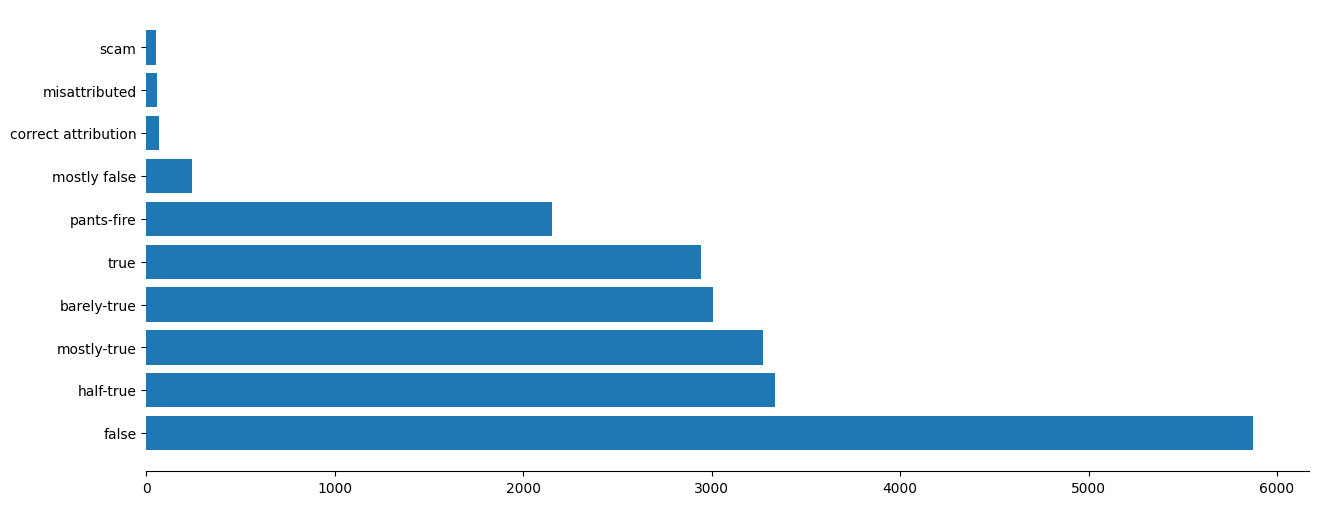

In [30]:
# Various labels.
plt.figure(figsize=(15,6))
plt.barh(data.label.value_counts().keys(), data.label.value_counts().values)
sns.despine(left=True)
plt.show()

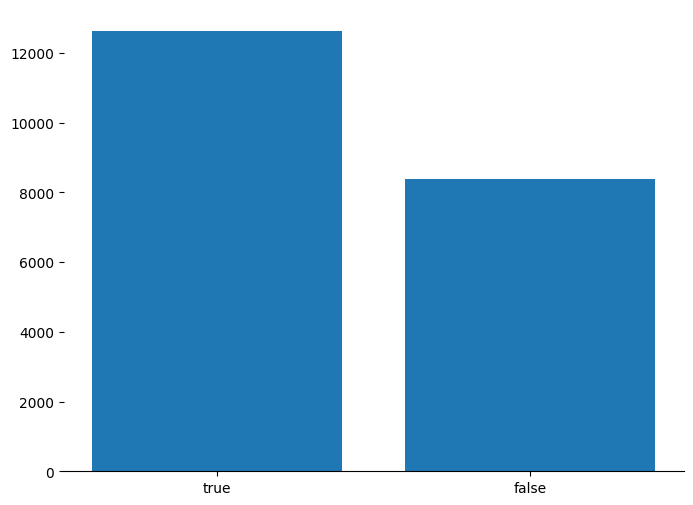

In [31]:
# Labels in "target" column after merging.
plt.figure(figsize=(8,6))
plt.bar(data.target.value_counts().keys(), data.target.value_counts().values)
sns.despine(left=True)
plt.show()

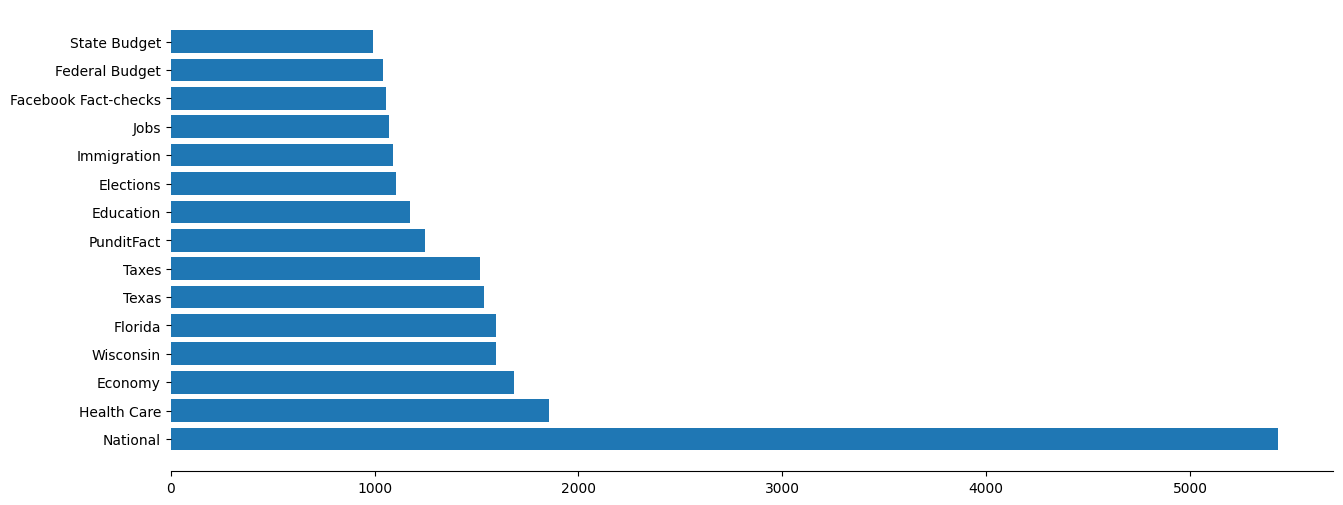

In [32]:
# Most common subjects.
subject_list = Counter([item for sublist in list(data.topic) for item in sublist])

plt.figure(figsize=(15,6))
plt.barh([category[0] for category in subject_list.most_common(15)], [category[1] for category in subject_list.most_common(15)])
sns.despine(left=True)
plt.show()

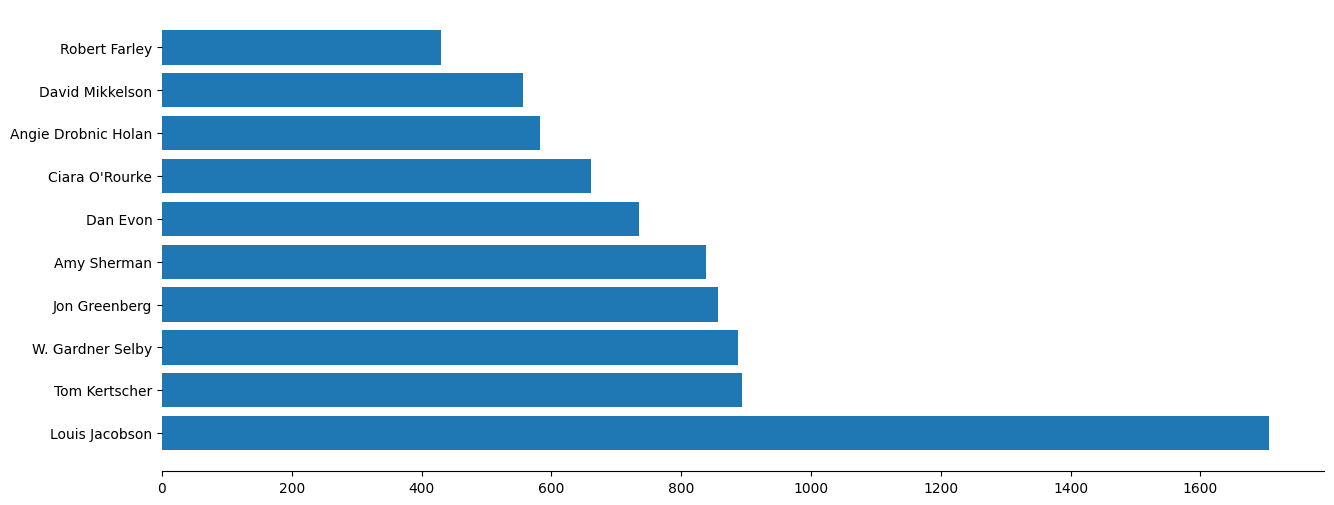

In [33]:
# Most frequent fact checkers.
plt.figure(figsize=(15,6))
plt.barh(data.factchecker.value_counts().head(10).keys(), data.factchecker.value_counts().head(10).values)
sns.despine(left=True)
plt.show()

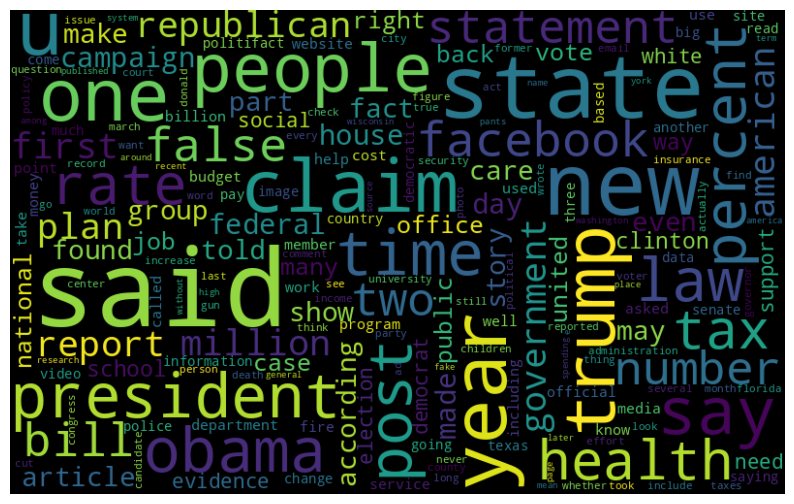

In [34]:
# Most common words in fake-news articles.
from wordcloud import WordCloud

fake_data = data.loc[(data['target'] == "false")]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

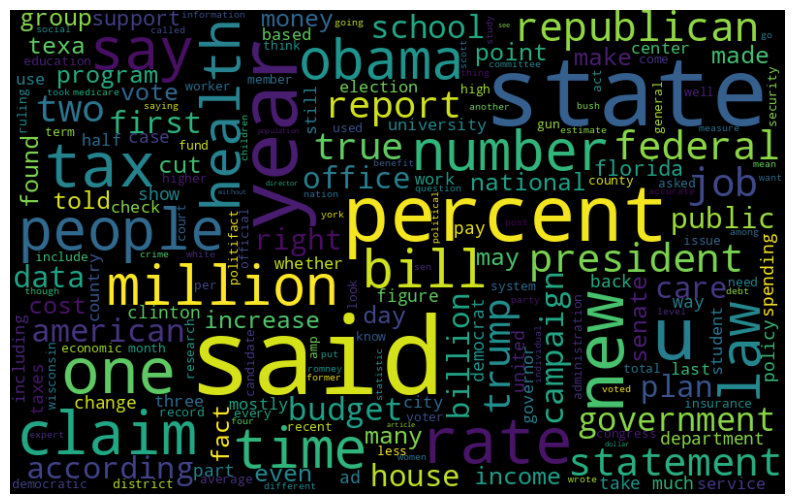

In [35]:
# Most common words in true articles.
true_data = data.loc[(data['target'] == "true")]
all_words = ' '.join([text for text in true_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
# Most frequent words counter
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

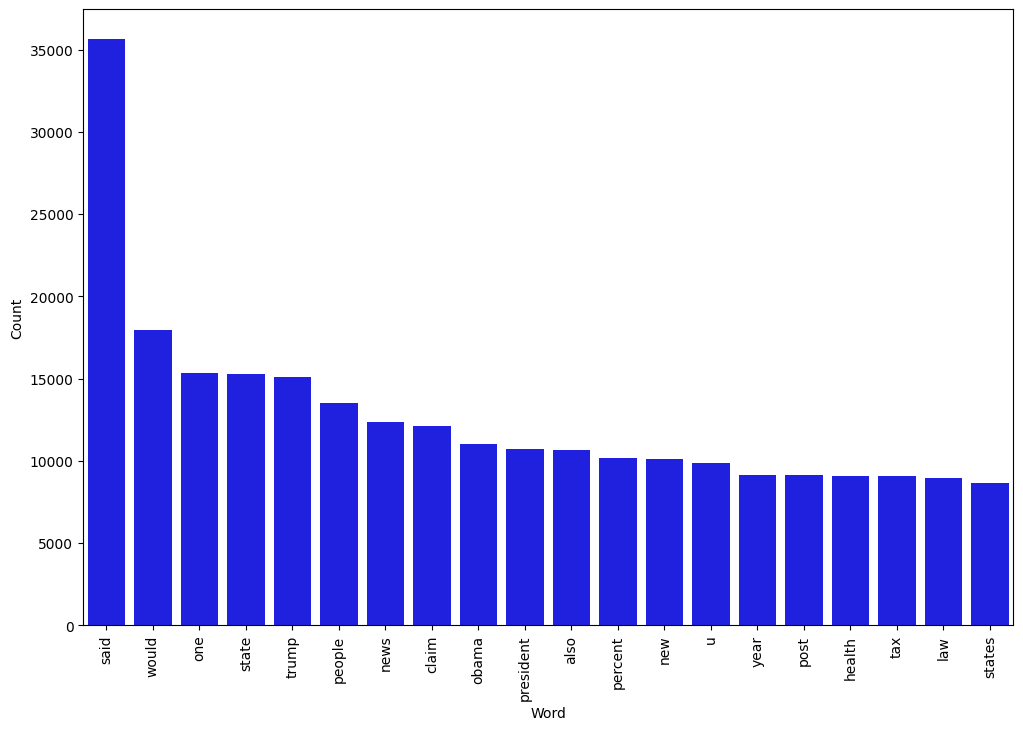

In [37]:
# Most frequent words in fake news.
counter(fake_data, "text", 20)

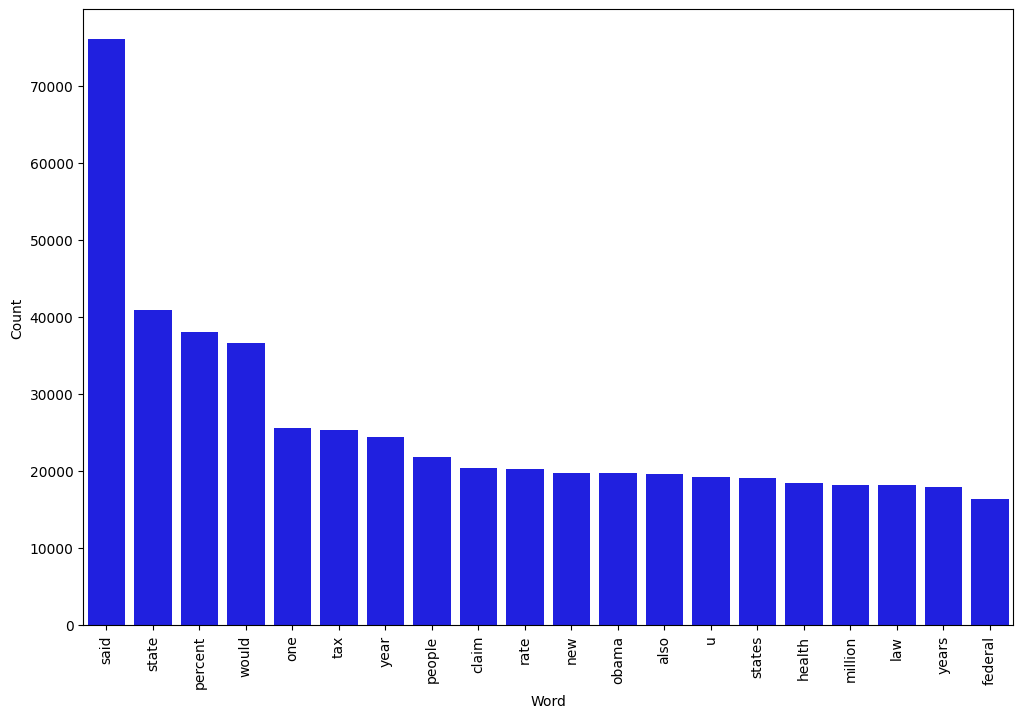

In [38]:
# Most frequent words in true news.
counter(true_data, "text", 20)

# Classification

In [39]:
# Helper functions

def getModelName(modelType):
    if modelType == 'NB':
        return 'Naive Bayes'
    if modelType == 'LR':
        return 'Logistic Regression'
    if modelType == 'DT':
        return 'Decision Tree'
    if modelType == 'RF': 
        return 'Random Forest'
    if modelType == 'MLP':
        return 'Multi-layer Perceptron'
    return ''

In [40]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

def applyMLModel(X_train, y_train, X_test, y_test, pipeline, modelType='LR'):
    modelName = getModelName(modelType)
    if modelName == '':
        raise ValueError("invalid model type")

    model = pipeline.fit(X_train, y_train)
    prediction = model.predict(X_test)
        
    print('MachineLearning Model:', modelName)
    print('='*72)
    print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))
    print("Precision (true): {}%".format(round(metrics.precision_score(y_test, prediction, pos_label="true")*100, 2)))
    print("Precision (false): {}%".format(round(metrics.precision_score(y_test, prediction, pos_label="false")*100, 2)))
    print("Recall (true): {}%".format(round(metrics.recall_score(y_test, prediction, pos_label="true")*100, 2)))
    print("Recall (false): {}%".format(round(metrics.recall_score(y_test, prediction, pos_label="false")*100, 2)))
    print("F1 (true): {}%".format(round(metrics.f1_score(y_test, prediction, pos_label="true")*100, 2)))
    print("F1 (false): {}%".format(round(metrics.f1_score(y_test, prediction, pos_label="false")*100, 2)))

    print('='*72)

    # Plot CONFUSION MATRIX
    cm = metrics.confusion_matrix(y_test, prediction)

    categories = ['fake', 'true']
    sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'BuPu', xticklabels=categories, yticklabels=categories)
    plt.ylabel('True Value')
    plt.xlabel('Predicted value')   
    plt.title("Confusion Matrix of " + modelName)         

In [41]:
# Split the data
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(data.text, data.target, test_size=0.2, random_state=random_state)

#### The naive bayes classifier performs pretty poorly, given that it predicts more fake news articles as true than fake. 
#### Seemingly it seems to heavily favor classifying news as true.

MachineLearning Model: Naive Bayes
Accuracy: 72.95%
Precision (true): 70.37%
Precision (false): 84.68%
Recall (true): 95.43%
Recall (false): 38.59%
F1 (true): 81.0%
F1 (false): 53.02%


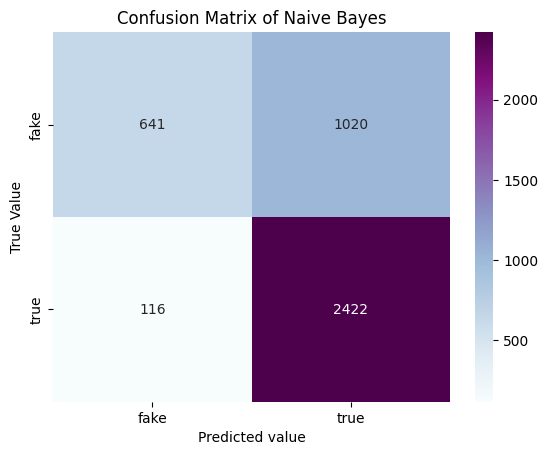

In [234]:
# Naive Bayes classifier.
applyMLModel(
    X_train, y_train, X_test, y_test, 
    Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', MultinomialNB())
    ]), 
    "NB"
)

#### The logistic regression classifier performs better than the naive bayes one, but still seems favor classifying news as true. 

MachineLearning Model: Logistic Regression
Accuracy: 79.61%
Precision (true): 78.43%
Precision (false): 82.43%
Recall (true): 91.41%
Recall (false): 61.59%
F1 (true): 84.43%
F1 (false): 70.5%


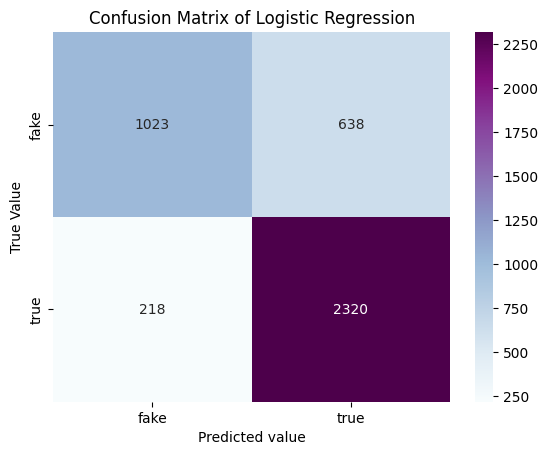

In [235]:
# Logistic Regression classifier.
applyMLModel(
    X_train, y_train, X_test, y_test, 
    Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', LogisticRegression(random_state=random_state))
    ]), 
    "LR"
)

#### The decision tree classifier performs really well, with no score metric being low. 

MachineLearning Model: Decision Tree
Accuracy: 90.97%
Precision (true): 93.41%
Precision (false): 87.44%
Recall (true): 91.53%
Recall (false): 90.13%
F1 (true): 92.46%
F1 (false): 88.76%


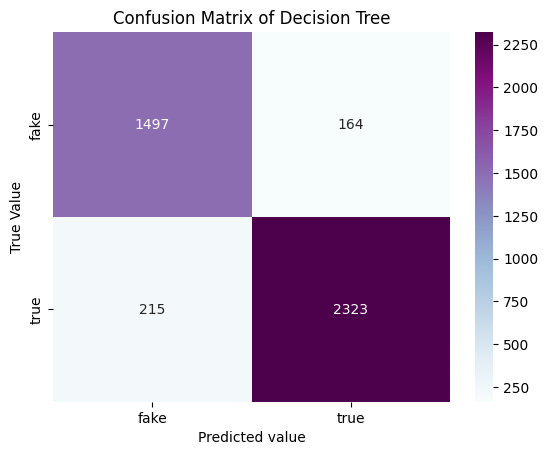

In [236]:
# Decision Tree classifier with semi-random arguments.
applyMLModel(
    X_train, y_train, X_test, y_test, 
    Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', DecisionTreeClassifier(criterion='entropy',
                                        max_depth=20, 
                                        splitter='best', 
                                        random_state=random_state))
    ]),
    "DT"
)

#### Interestingly the random forest classifier performs worse than a single decision tree classifier.
#### It too seems to struggle with classifying too many fake news articles as true.

MachineLearning Model: Random Forest
Accuracy: 79.42%
Precision (true): 77.46%
Precision (false): 84.62%
Recall (true): 93.03%
Recall (false): 58.64%
F1 (true): 84.53%
F1 (false): 69.27%


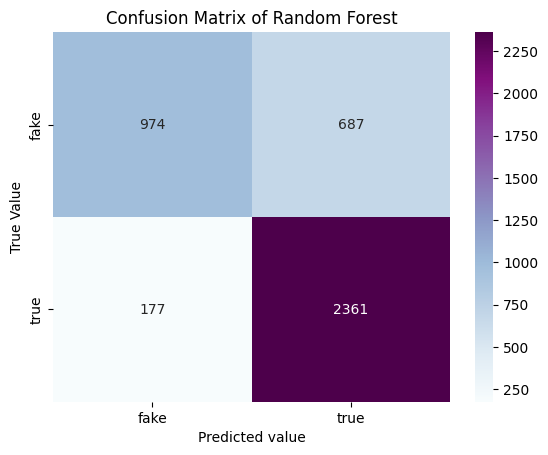

In [237]:
# Random Forest classifier with semi-random arguments.
applyMLModel(
    X_train, y_train, X_test, y_test, 
    Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', RandomForestClassifier(n_estimators=50, criterion="entropy", random_state=random_state))
    ]),
    "RF"
)

#### An MLP neural network classifier performs similarly to other subpar classifiers we have tested until now.
#### Given that there are so many ways to tweak various input parameters for a neural network, we decided to further explore this classifier.

MachineLearning Model: Multi-layer Perceptron
Accuracy: 75.61%
Precision (true): 77.21%
Precision (false): 72.48%
Recall (true): 84.63%
Recall (false): 61.83%
F1 (true): 80.75%
F1 (false): 66.73%


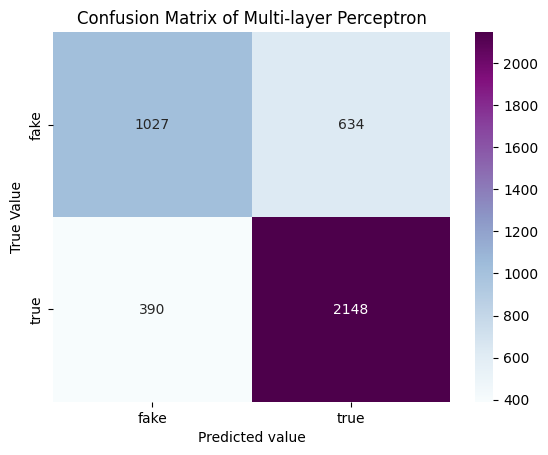

In [238]:
# Multi-layer Perceptron classifier with semi-random arguments. The solver "lbfgs" seems to give the best performance for our data.
applyMLModel(
    X_train, y_train, X_test, y_test, 
    Pipeline([
        ('vect' , CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('model', MLPClassifier(activation="relu", solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=random_state))
    ]),
    "MLP"
)

In [239]:
# Trying different depth and width for the neural network
# This takes approximately 20 mins to run.
MLParametersDF = pd.DataFrame(columns=[
    "NHiddenLayers", "NNodes", "Accuracy", 
    "PrecisionTrue", "PrecisionFalse", "RecallTrue", 
    "RecallFalse", "F1True", "F1False"
])
for i in range(10):
    for j in range(6):
        pipeline = Pipeline([
            ('vect' , CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('scaler', StandardScaler(with_mean=False)),
            ('model', MLPClassifier(activation="relu", solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(i+1, j+1), random_state=random_state, max_iter=100000))
        ])
        model = pipeline.fit(X_train, y_train)
        prediction = model.predict(X_test)
        accuracy = accuracy_score(y_test, prediction)
        precisionTrue = metrics.precision_score(y_test, prediction, pos_label="true", zero_division=0)
        precisionFalse = metrics.precision_score(y_test, prediction, pos_label="false", zero_division=0)
        recallTrue = metrics.recall_score(y_test, prediction, pos_label="true", zero_division=0)
        recallFalse = metrics.recall_score(y_test, prediction, pos_label="false", zero_division=0)
        f1True = metrics.f1_score(y_test, prediction, pos_label="true", zero_division=0)
        f1False = metrics.f1_score(y_test, prediction, pos_label="false", zero_division=0)

        MLParametersDF = pd.concat([pd.DataFrame(
            [[i+1, j+1, accuracy, precisionTrue, precisionFalse, recallTrue, recallFalse, f1True, f1False]], 
            columns=MLParametersDF.columns), MLParametersDF], ignore_index=True
        )
        

In [240]:
bestAccuracyMLP = MLParametersDF["Accuracy"].max()
bestPrecisionTrueMLP = MLParametersDF["PrecisionTrue"].max()
bestPrecisionFalseMLP = MLParametersDF["PrecisionFalse"].max()
bestRecallTrueMLP = MLParametersDF["RecallTrue"].max()
bestRecallFalseMLP = MLParametersDF["RecallFalse"].max()
bestF1TrueMLP = MLParametersDF["F1True"].max()
bestF1FalseMLP = MLParametersDF["F1False"].max()

bestAccuracyLayers = MLParametersDF[MLParametersDF["Accuracy"] == bestAccuracyMLP]["NHiddenLayers"].values[0]
bestAccuracyNodes = MLParametersDF[MLParametersDF["Accuracy"] == bestAccuracyMLP]["NNodes"].values[0]

bestPrecisionTrueLayers = MLParametersDF[MLParametersDF["PrecisionTrue"] == bestPrecisionTrueMLP]["NHiddenLayers"].values[0]
bestPrecisionTrueNodes = MLParametersDF[MLParametersDF["PrecisionTrue"] == bestPrecisionTrueMLP]["NNodes"].values[0]
bestPrecisionFalseLayers = MLParametersDF[MLParametersDF["PrecisionFalse"] == bestPrecisionFalseMLP]["NHiddenLayers"].values[0]
bestPrecisionFalseNodes = MLParametersDF[MLParametersDF["PrecisionFalse"] == bestPrecisionFalseMLP]["NNodes"].values[0]

bestRecallTrueLayers = MLParametersDF[MLParametersDF["RecallTrue"] == bestRecallTrueMLP]["NHiddenLayers"].values[0]
bestRecallTrueNodes = MLParametersDF[MLParametersDF["RecallTrue"] == bestRecallTrueMLP]["NNodes"].values[0]
bestRecallFalseLayers = MLParametersDF[MLParametersDF["RecallFalse"] == bestRecallFalseMLP]["NHiddenLayers"].values[0]
bestRecallFalseNodes = MLParametersDF[MLParametersDF["RecallFalse"] == bestRecallFalseMLP]["NNodes"].values[0]

bestF1TrueLayers = MLParametersDF[MLParametersDF["F1True"] == bestF1TrueMLP]["NHiddenLayers"].values[0]
bestF1TrueNodes = MLParametersDF[MLParametersDF["F1True"] == bestF1TrueMLP]["NNodes"].values[0]
bestF1FalseLayers = MLParametersDF[MLParametersDF["F1False"] == bestF1FalseMLP]["NHiddenLayers"].values[0]
bestF1FalseNodes = MLParametersDF[MLParametersDF["F1False"] == bestF1FalseMLP]["NNodes"].values[0]

print(f"Best width and depth for accuracy: ({bestAccuracyLayers}, {bestAccuracyNodes}). Accuracy: {bestAccuracyMLP:.3f}")
print(f"Best width and depth for precision (true): ({bestPrecisionTrueLayers}, {bestPrecisionTrueNodes}). Accuracy: {bestPrecisionTrueMLP:.3f}")
print(f"Best width and depth for precision (false): ({bestPrecisionFalseLayers}, {bestPrecisionFalseNodes}). Accuracy: {bestPrecisionFalseMLP:.3f}")
print(f"Best width and depth for recall (true): ({bestRecallTrueLayers}, {bestRecallTrueNodes}). Accuracy: {bestRecallTrueMLP:.3f}")
print(f"Best width and depth for recall (false): ({bestRecallFalseLayers}, {bestRecallFalseNodes}). Accuracy: {bestRecallFalseMLP:.3f}")
print(f"Best width and depth for f1 (true): ({bestF1TrueLayers}, {bestF1TrueNodes}). Accuracy: {bestF1TrueMLP:.3f}")
print(f"Best width and depth for f1 (false): ({bestF1FalseLayers}, {bestF1FalseNodes}). Accuracy: {bestF1FalseMLP:.3f}")

Best width and depth for accuracy: (1, 4). Accuracy: 0.769
Best width and depth for precision (true): (10, 1). Accuracy: 0.855
Best width and depth for precision (false): (4, 2). Accuracy: 0.797
Best width and depth for recall (true): (1, 1). Accuracy: 1.000
Best width and depth for recall (false): (10, 1). Accuracy: 0.841
Best width and depth for f1 (true): (1, 4). Accuracy: 0.824
Best width and depth for f1 (false): (7, 5). Accuracy: 0.709


MachineLearning Model: Multi-layer Perceptron
Accuracy: 76.88%
Precision (true): 76.39%
Precision (false): 78.05%
Recall (true): 89.36%
Recall (false): 57.8%
F1 (true): 82.37%
F1 (false): 66.41%


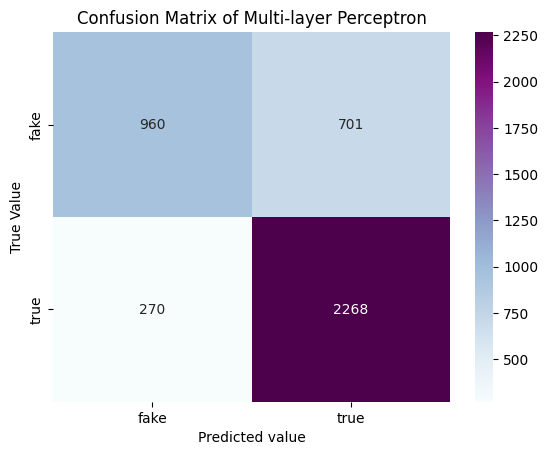

In [241]:
applyMLModel(
    X_train, y_train, X_test, y_test, 
    Pipeline([
        ('vect' , CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('scaler', StandardScaler(with_mean=False)),
        ('model', MLPClassifier(activation="relu", solver="lbfgs", alpha=1e-5, 
                                hidden_layer_sizes=(bestAccuracyLayers, bestAccuracyNodes), 
                                random_state=random_state, max_iter=100000)
        )
    ]),
    "MLP"
)

#### Despite the above result giving the best accuracy, we can see that the recall (false) score is poor.
#### As we can see from the plot below, the different scores vary greatly from different input parameters.

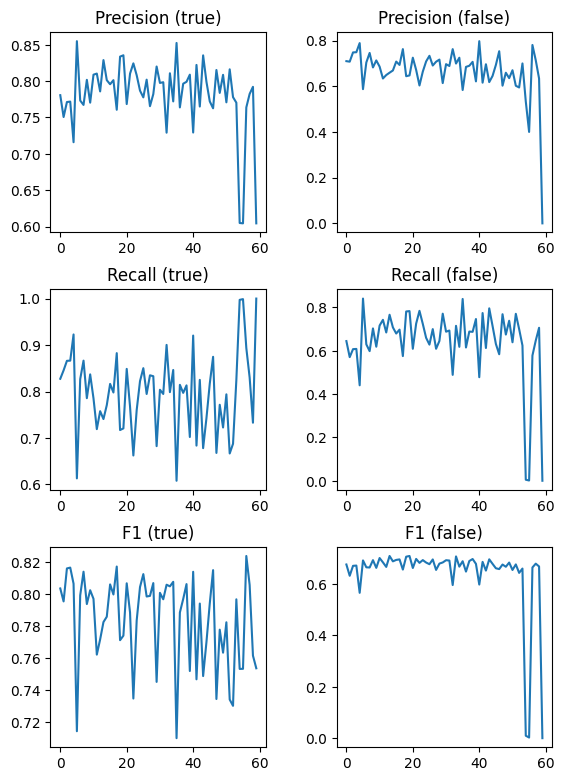

In [242]:
fig = plt.figure(figsize=(6, 8))
axs = fig.subplots(3, 2)
fig.tight_layout(pad=2)

axs[0, 0].plot(MLParametersDF["PrecisionTrue"])
axs[0, 0].set_title("Precision (true)")

axs[0, 1].plot(MLParametersDF["PrecisionFalse"])
axs[0, 1].set_title("Precision (false)")

axs[1, 0].plot(MLParametersDF["RecallTrue"])
axs[1, 0].set_title("Recall (true)")

axs[1, 1].plot(MLParametersDF["RecallFalse"])
axs[1, 1].set_title("Recall (false)")

axs[2, 0].plot(MLParametersDF["F1True"])
axs[2, 0].set_title("F1 (true)")

axs[2, 1].plot(MLParametersDF["F1False"])
_ = axs[2, 1].set_title("F1 (false)")

#### This result might stem from the node activation function we are using.
#### Here we try with the logistic activation function.

In [243]:
# This takes approximately 24 mins to run.
MLParametersDFLogistic = pd.DataFrame(columns=[
    "NHiddenLayers", "NNodes", "Accuracy", 
    "PrecisionTrue", "PrecisionFalse", "RecallTrue", 
    "RecallFalse", "F1True", "F1False"
])
for i in range(10):
    for j in range(6):
        pipeline = Pipeline([
            ('vect' , CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('scaler', StandardScaler(with_mean=False)),
            ('model', MLPClassifier(activation="logistic", solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(i+1, j+1), random_state=random_state, max_iter=100000))
        ])
        model = pipeline.fit(X_train, y_train)
        prediction = model.predict(X_test)
        accuracy = accuracy_score(y_test, prediction)
        precisionTrue = metrics.precision_score(y_test, prediction, pos_label="true", zero_division=0)
        precisionFalse = metrics.precision_score(y_test, prediction, pos_label="false", zero_division=0)
        recallTrue = metrics.recall_score(y_test, prediction, pos_label="true", zero_division=0)
        recallFalse = metrics.recall_score(y_test, prediction, pos_label="false", zero_division=0)
        f1True = metrics.f1_score(y_test, prediction, pos_label="true", zero_division=0)
        f1False = metrics.f1_score(y_test, prediction, pos_label="false", zero_division=0)

        MLParametersDFLogistic = pd.concat([pd.DataFrame(
            [[i+1, j+1, accuracy, precisionTrue, precisionFalse, recallTrue, recallFalse, f1True, f1False]], 
            columns=MLParametersDF.columns), MLParametersDF], ignore_index=True
        )

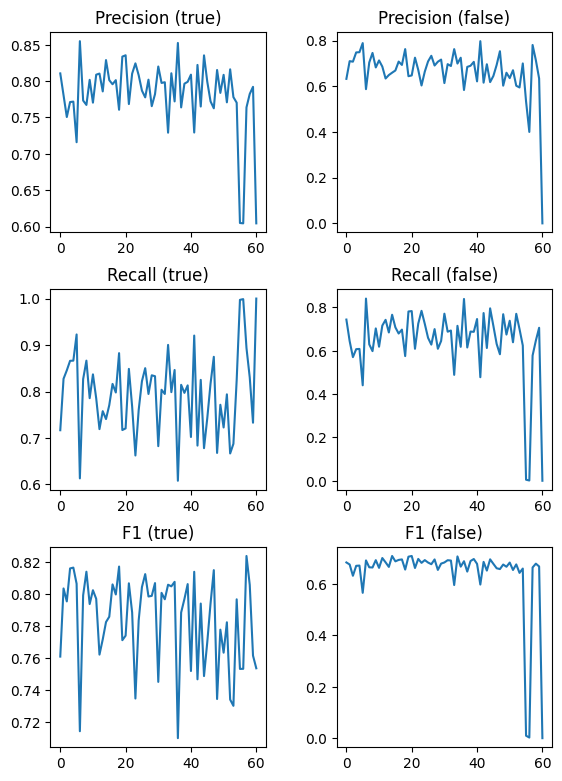

In [244]:
fig = plt.figure(figsize=(6, 8))
axs = fig.subplots(3, 2)
fig.tight_layout(pad=2)

axs[0, 0].plot(MLParametersDFLogistic["PrecisionTrue"])
axs[0, 0].set_title("Precision (true)")

axs[0, 1].plot(MLParametersDFLogistic["PrecisionFalse"])
axs[0, 1].set_title("Precision (false)")

axs[1, 0].plot(MLParametersDFLogistic["RecallTrue"])
axs[1, 0].set_title("Recall (true)")

axs[1, 1].plot(MLParametersDFLogistic["RecallFalse"])
axs[1, 1].set_title("Recall (false)")

axs[2, 0].plot(MLParametersDFLogistic["F1True"])
axs[2, 0].set_title("F1 (true)")

axs[2, 1].plot(MLParametersDFLogistic["F1False"])
_ = axs[2, 1].set_title("F1 (false)")

#### Looking at the various scores, they of similar nature to when we used the relu activation function.
#### It seems then that there is no marked improvement from using the logistic activation function.
#### Different activation functions were attempted, but gave similar, our significantly worse results, and are therefor not documented here.

# Decision Tree Experimentation
#### Here we further explore the decision tree classifier, as it gave us the seemingly best general performance.
#### We try tweaking the criterion function used, as well as the max depth for the tree, to see if we can get better performance.

In [42]:
# Testing various max depths for the decision tree classifier.
# This takes approximately 10 mins to run.
maxDepths = np.arange(1, 31) # Testing max_depth values between 1 and 30
criterions = ['gini', 'log_loss'] # Could also test for "entropy" here, but given that this is a binary classification problem, they result in the same outcome.
DTParametersDF = pd.DataFrame(columns=[
    "Criterion", "MaxDepth", "Accuracy",
    "PrecisionTrue", "PrecisionFalse", "RecallTrue", 
    "RecallFalse", "F1True", "F1False"
])

for criterion in criterions:
    for depth in maxDepths:
        pipeline = Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('model', DecisionTreeClassifier(criterion=criterion,
                                            max_depth=depth, 
                                            splitter='best', 
                                            random_state=random_state))
        ])
        model = pipeline.fit(X_train, y_train)
        prediction = model.predict(X_test)
        accuracy = accuracy_score(y_test, prediction)
        precisionTrue = metrics.precision_score(y_test, prediction, pos_label="true")
        precisionFalse = metrics.precision_score(y_test, prediction, pos_label="false")
        recallTrue = metrics.recall_score(y_test, prediction, pos_label="true")
        recallFalse = metrics.recall_score(y_test, prediction, pos_label="false")
        f1True = metrics.f1_score(y_test, prediction, pos_label="true")
        f1False = metrics.f1_score(y_test, prediction, pos_label="false")
        
        DTParametersDF = pd.concat([pd.DataFrame(
            [[criterion, depth, accuracy, precisionTrue, precisionFalse, recallTrue, recallFalse, f1True, f1False]], 
            columns=DTParametersDF.columns), DTParametersDF], ignore_index=True
        )

In [43]:
DTParametersDF.head()

,Criterion,MaxDepth,Accuracy,PrecisionTrue,PrecisionFalse,RecallTrue,RecallFalse,F1True,F1False
0,log_loss,30,0.910931,0.933147,0.878307,0.918440,0.899458,0.925735,0.888757
1,log_loss,29,0.914503,0.932513,0.887500,0.925532,0.897652,0.929009,0.892547
2,log_loss,28,0.912598,0.929221,0.887425,0.925926,0.892234,0.927571,0.889823
3,log_loss,27,0.912360,0.933307,0.881416,0.920804,0.899458,0.927013,0.890346
4,log_loss,26,0.909740,0.928203,0.882002,0.921986,0.891030,0.925084,0.886493


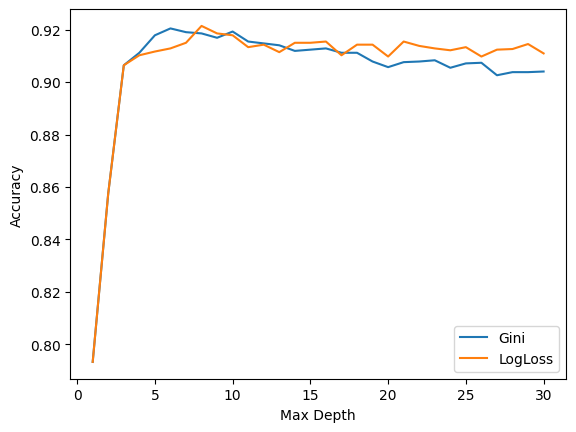

In [44]:
fig = plt.figure()
ax = fig.subplots()
ax.plot(DTParametersDF[DTParametersDF["Criterion"] == "gini"]["MaxDepth"], DTParametersDF[DTParametersDF["Criterion"] == "gini"]["Accuracy"], label="Gini")
ax.plot(DTParametersDF[DTParametersDF["Criterion"] == "log_loss"]["MaxDepth"], DTParametersDF[DTParametersDF["Criterion"] == "log_loss"]["Accuracy"], label="LogLoss")
ax.legend()
ax.set_xlabel("Max Depth")
_ = ax.set_ylabel("Accuracy")

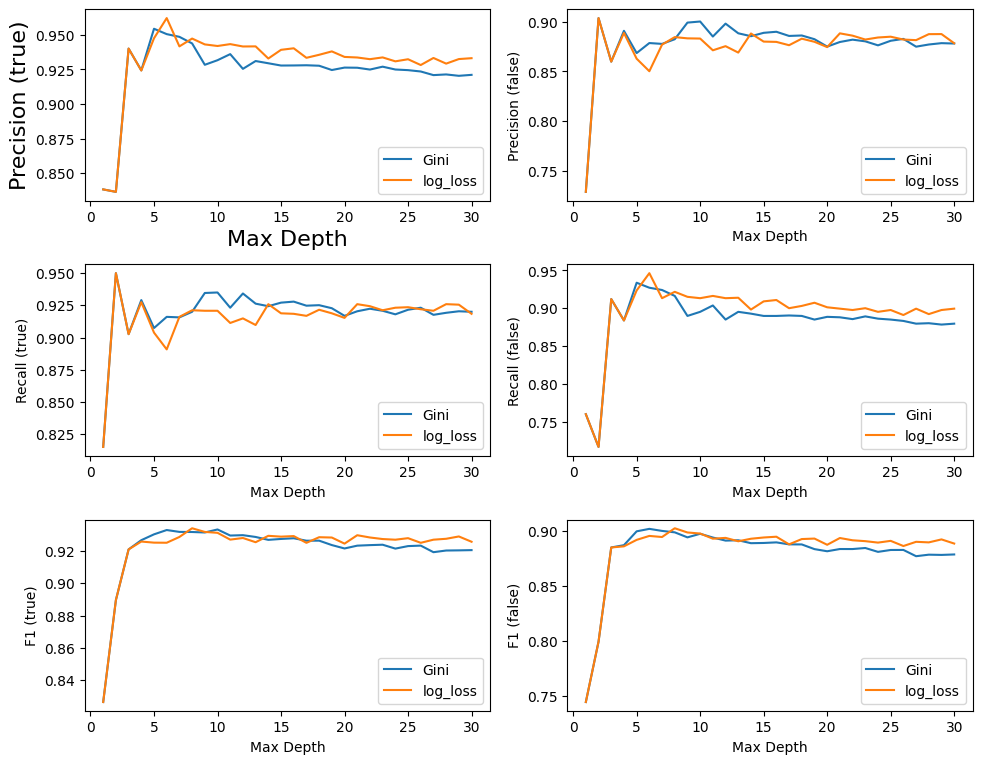

In [47]:
fig = plt.figure(figsize=(10, 8))
axs = fig.subplots(3, 2)
fig.tight_layout(pad=2.5)

axs[0, 0].plot(DTParametersDF[DTParametersDF["Criterion"] == "gini"]["MaxDepth"], DTParametersDF[DTParametersDF["Criterion"] == "gini"]["PrecisionTrue"], label="Gini")
axs[0, 0].plot(DTParametersDF[DTParametersDF["Criterion"] == "log_loss"]["MaxDepth"], DTParametersDF[DTParametersDF["Criterion"] == "log_loss"]["PrecisionTrue"], label="log_loss")
axs[0, 0].legend()
axs[0, 0].set_xlabel("Max Depth", fontsize=16)
axs[0, 0].set_ylabel("Precision (true)", fontsize=16)

axs[0, 1].plot(DTParametersDF[DTParametersDF["Criterion"] == "gini"]["MaxDepth"], DTParametersDF[DTParametersDF["Criterion"] == "gini"]["PrecisionFalse"], label="Gini")
axs[0, 1].plot(DTParametersDF[DTParametersDF["Criterion"] == "log_loss"]["MaxDepth"], DTParametersDF[DTParametersDF["Criterion"] == "log_loss"]["PrecisionFalse"], label="log_loss")
axs[0, 1].legend()
axs[0, 1].set_xlabel("Max Depth", fontsize=16)
axs[0, 1].set_ylabel("Precision (false)", fontsize=16)

axs[1, 0].plot(DTParametersDF[DTParametersDF["Criterion"] == "gini"]["MaxDepth"], DTParametersDF[DTParametersDF["Criterion"] == "gini"]["RecallTrue"], label="Gini")
axs[1, 0].plot(DTParametersDF[DTParametersDF["Criterion"] == "log_loss"]["MaxDepth"], DTParametersDF[DTParametersDF["Criterion"] == "log_loss"]["RecallTrue"], label="log_loss")
axs[1, 0].legend()
axs[1, 0].set_xlabel("Max Depth", fontsize=16)
axs[1, 0].set_ylabel("Recall (true)", fontsize=16)

axs[1, 1].plot(DTParametersDF[DTParametersDF["Criterion"] == "gini"]["MaxDepth"], DTParametersDF[DTParametersDF["Criterion"] == "gini"]["RecallFalse"], label="Gini")
axs[1, 1].plot(DTParametersDF[DTParametersDF["Criterion"] == "log_loss"]["MaxDepth"], DTParametersDF[DTParametersDF["Criterion"] == "log_loss"]["RecallFalse"], label="log_loss")
axs[1, 1].legend()
axs[1, 1].set_xlabel("Max Depth", fontsize=16)
axs[1, 1].set_ylabel("Recall (false)", fontsize=16)

axs[2, 0].plot(DTParametersDF[DTParametersDF["Criterion"] == "gini"]["MaxDepth"], DTParametersDF[DTParametersDF["Criterion"] == "gini"]["F1True"], label="Gini")
axs[2, 0].plot(DTParametersDF[DTParametersDF["Criterion"] == "log_loss"]["MaxDepth"], DTParametersDF[DTParametersDF["Criterion"] == "log_loss"]["F1True"], label="log_loss")
axs[2, 0].legend()
axs[2, 0].set_xlabel("Max Depth", fontsize=16)
axs[2, 0].set_ylabel("F1 (true)", fontsize=16)

axs[2, 1].plot(DTParametersDF[DTParametersDF["Criterion"] == "gini"]["MaxDepth"], DTParametersDF[DTParametersDF["Criterion"] == "gini"]["F1False"], label="Gini")
axs[2, 1].plot(DTParametersDF[DTParametersDF["Criterion"] == "log_loss"]["MaxDepth"], DTParametersDF[DTParametersDF["Criterion"] == "log_loss"]["F1False"], label="log_loss")
axs[2, 1].legend()
axs[2, 1].set_xlabel("Max Depth", fontsize=16)
_ = axs[2, 1].set_ylabel("F1 (false)", fontsize=16)

#### From the data, we see that the log_loss criterion function performs generally better for almost all score metrics.
#### Furthermore, despite some early outliers (when max depth is low), the scores vary relatively little.

Criterion and max depth giving the best accuracy: log_loss, 8
MachineLearning Model: Decision Tree
Accuracy: 92.14%
Precision (true): 94.73%
Precision (false): 88.45%
Recall (true): 92.12%
Recall (false): 92.17%
F1 (true): 93.41%
F1 (false): 90.27%


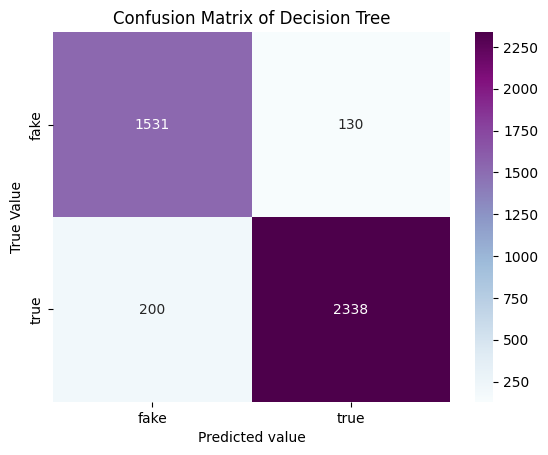

In [249]:
# Plotting decision tree, with max depth and criterion function that gave the best accuracy.
bestAccuracyDT = DTParametersDF["Accuracy"].max()
bestCriterionDT = DTParametersDF[DTParametersDF["Accuracy"] == bestAccuracyDT]["Criterion"].values[0]
bestMaxDepthDT = DTParametersDF[DTParametersDF["Accuracy"] == bestAccuracyDT]["MaxDepth"].values[0]
print(f"Criterion and max depth giving the best accuracy: {bestCriterionDT}, {bestMaxDepthDT}")
applyMLModel(
    X_train, y_train, X_test, y_test, 
    Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', DecisionTreeClassifier(criterion=bestCriterionDT,
                                        max_depth=bestMaxDepthDT, 
                                        splitter='best', 
                                        random_state=random_state))
    ]),
    "DT"
)